https://github.com/facebook/prophet
https://facebook.github.io/prophet/docs/quick_start.html#python-api

Prophet is a procedure for forecasting time series data. It is based on an additive model where non-linear trends are fit with yearly and weekly seasonality, plus holidays. It works best with daily periodicity data with at least one year of historical data. Prophet is robust to missing data, shifts in the trend, and large outliers.

## Input
The input to Prophet is always a dataframe with two columns: `ds` and `y`. The ds (datestamp) column must contain a date or datetime (either is fine). The y column must be numeric, and represents the measurement we wish to forecast.

# Installation
1. `pip install pystan`
1. `pip install fbprophet`

In [1]:
import quilt
quilt.install("examples/prophet", force=True)

100%|██████████| 125k/125k [00:00<00:00, 20.8MB/s]

In [2]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

from quilt.data.examples import prophet as pdata

In [3]:
df = pdata.peyton_manning()
df.head()

,ds,y
0,2007-12-10,14629
1,2007-12-11,5012
2,2007-12-12,3582
3,2007-12-13,3205
4,2007-12-14,2680


In [10]:
m = Prophet()
df['y'] = np.log(df['y'])
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/karve/anaconda3/envs/dev/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [11]:
future = m.make_future_dataframe(periods=365)
future.head()

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14


In [12]:
forecast = m.predict(future)

In [13]:
forecast.columns

Index(['ds', 'trend', 'trend_lower', 'trend_upper', 'yhat_lower', 'yhat_upper',
       'seasonal', 'seasonal_lower', 'seasonal_upper', 'seasonalities',
       'seasonalities_lower', 'seasonalities_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper', 'yhat'],
      dtype='object')

In [14]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.209074,7.515572,8.905627
3266,2017-01-16,8.534139,7.812668,9.218685
3267,2017-01-17,8.321541,7.591146,9.036876
3268,2017-01-18,8.154138,7.423172,8.834252
3269,2017-01-19,8.166091,7.480083,8.921628


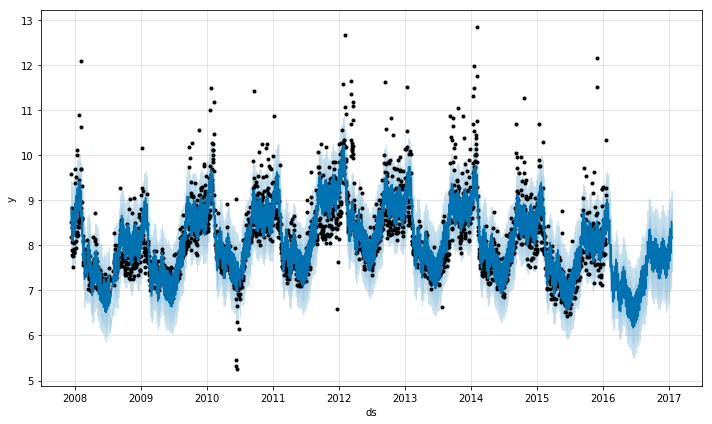

In [15]:
m.plot(forecast)

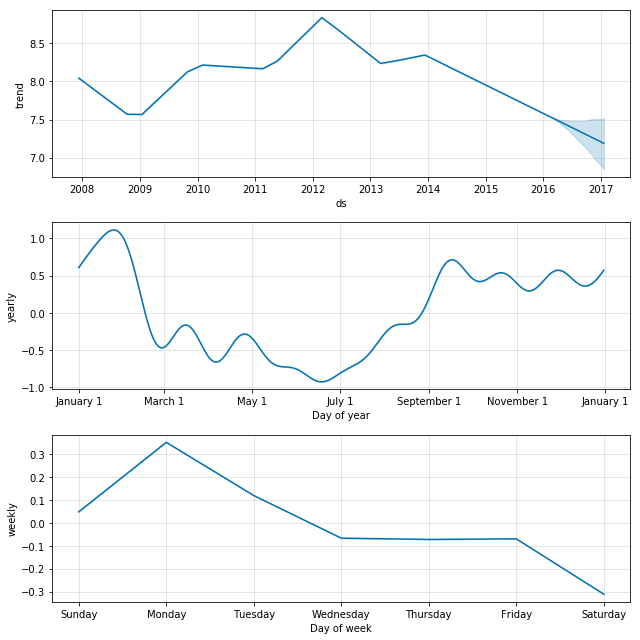

In [16]:
m.plot_components(forecast)